In [36]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pickle
import os
from mutation import *
from crossover import *
from rmp import *
from mfea import *
from task import *
from llm import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
gnbg_tasks = []
gnbg_tasks.append(GNBGTask(1, 100))
gnbg_tasks.append(GNBGTask(2, 100))
gnbg_tasks.append(GNBGTask(3, 100))
gnbg_tasks.append(GNBGTask(4, 100))
gnbg_tasks.append(GNBGTask(5, 100))
gnbg_tasks.append(GNBGTask(6, 100))

In [38]:

API_KEY = os.getenv("DEEPSEEK_API_KEY")
print(API_KEY)


sk-505a4ff57cfb432d8888a3d8d66a3133


In [39]:
num_indis_per_task = 100
indi_len = 30
bound = 100
crossover = BLXCrossover()
mutation = PolynomialMutation(20)
rmp = NormalRMP(0.3)

amfea = AMFEA(num_indis_per_task, indi_len, gnbg_tasks, crossover, mutation, rmp)

Initialization:
Task 0:
Best Fitness: 104525.11477751032
Mean Fitness: 173159.59849925735

Task 1:
Best Fitness: -701.3695729797028
Mean Fitness: -701.3107861867319

Task 2:
Best Fitness: 42181486463.465965
Mean Fitness: 90218404525.24722

Task 3:
Best Fitness: 469859.17687552265
Mean Fitness: 914175.9313988957

Task 4:
Best Fitness: -334.0916027219917
Mean Fitness: -333.99820870532204

Task 5:
Best Fitness: -183.4697014881224
Mean Fitness: -183.35072066834718



In [40]:
bfs, mfs = amfea.fit(1000, monitor=True, monitor_rate=500)

Gen 0
Task 0, Best: 104525.11477751032, Avg: 162063.9252273288
Task 1, Best: -701.3695729797028, Avg: -701.3158669175722
Task 2, Best: 42181486463.465965, Avg: 83196038839.15144
Task 3, Best: 469859.17687552265, Avg: 793824.9688438727
Task 4, Best: -334.0916027219917, Avg: -334.0103732656701
Task 5, Best: -183.4697014881224, Avg: -183.365047423973
Time taken each gen: 0.0167 seconds



In [34]:
for task in gnbg_tasks:
    print(task.gnbg.OptimumValue)

-1081.9837994003399
-703.1328146165181
-357.5797495903721
-382.6205211774271
-337.50899809752036
-186.86405320391498


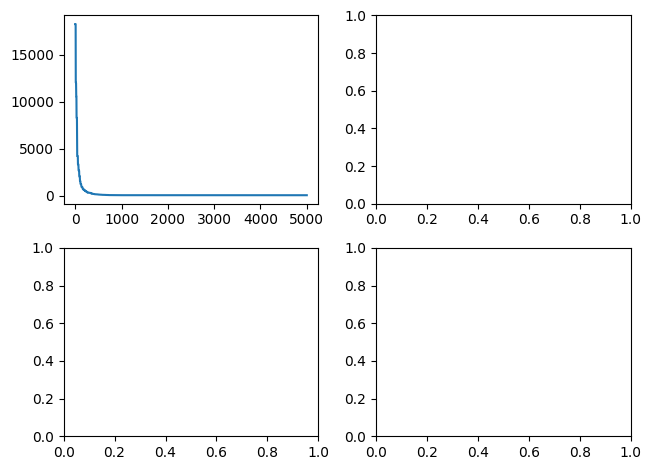

In [38]:
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
axes[0, 0].plot(bfs[0])

In [ ]:
with open('student_file.pkl', 'rb') as f:
    student_names_loaded = pickle.load(f) # deserialize using load()
    print(student_names_loaded) # print student names